In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D

In [12]:
class LinearRegression:
    def __init__(self, learning_rate: int = 0.01, epoch: int = 1000) -> None:
        self.learning_rate = learning_rate
        self.epoch = epoch
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape             # shape X: [N, d]
        self.weights = np.random.rand(num_features)     # shape W: [d, 1]
        self.bias = 0

        for i in range(self.epoch):
            y_pred = np.dot(X, self.weights) + self.bias    # shape: [N, 1]

            d_weights = np.dot(X.T, y_pred - y) / num_samples
            d_bias = np.sum(y_pred - y) / num_samples

            self.weights = self.weights - self.learning_rate * d_weights
            self.bias = self.bias - self.learning_rate * d_bias

        return self

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [13]:
X, y = datasets.make_regression(n_samples=500, n_features=3, noise=15, random_state=4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

model = LinearRegression(epoch=1000)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(f'MSE: {mean_squared_error(predictions, y_test)}')

MSE: 176.74477314849793


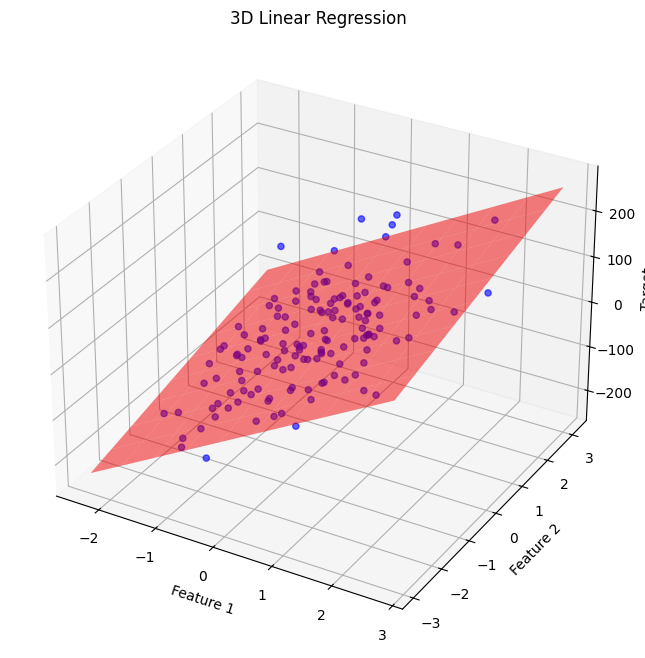

In [14]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='blue', label='Actual', alpha=0.6)

x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

X_grid = np.c_[x1_grid.ravel(), x2_grid.ravel(), np.zeros(x1_grid.size)]
y_pred_grid = model.predict(X_grid)

y_pred_grid = y_pred_grid.reshape(x1_grid.shape)
ax.plot_surface(x1_grid, x2_grid, y_pred_grid, color='red', alpha=0.5, label='Predicted Surface')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
ax.set_title('3D Linear Regression')


plt.show() 